## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  84.403686  1024.805056  0.727069  8.826093  750.045757
1  71.449129   748.710133  0.485235  2.504761  370.194877
2  47.592161  1216.866366  0.212396  4.269591  262.720874
3  51.878348  1517.404151  0.162351  7.251577  251.824486
4  16.326744  1651.433590  0.347985  2.562244  574.984545


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9498028	total: 58.3ms	remaining: 58.2s
1:	learn: 0.9382903	total: 58.8ms	remaining: 29.4s
2:	learn: 0.9284772	total: 59.4ms	remaining: 19.7s
3:	learn: 0.9182598	total: 60ms	remaining: 14.9s
4:	learn: 0.9044983	total: 60.4ms	remaining: 12s
5:	learn: 0.8941191	total: 61.1ms	remaining: 10.1s
6:	learn: 0.8816520	total: 61.7ms	remaining: 8.75s
7:	learn: 0.8688194	total: 62.3ms	remaining: 7.72s
8:	learn: 0.8592976	total: 62.7ms	remaining: 6.91s
9:	learn: 0.8483652	total: 63.2ms	remaining: 6.26s
10:	learn: 0.8386981	total: 63.8ms	remaining: 5.74s
11:	learn: 0.8244299	total: 64.3ms	remaining: 5.29s
12:	learn: 0.8121537	total: 64.8ms	remaining: 4.92s
13:	learn: 0.8009864	total: 65.2ms	remaining: 4.59s
14:	learn: 0.7904418	total: 65.5ms	remaining: 4.3s
15:	learn: 0.7812721	total: 65.9ms	remaining: 4.05s
16:	learn: 0.7704703	total: 66.2ms	remaining: 3.83s
17:	learn: 0.7626661	total: 66.7ms	remaining: 3.64s
18:	learn: 0.7547931	total: 67ms	remaining: 3.46s

96:	learn: 0.2939244	total: 102ms	remaining: 948ms
97:	learn: 0.2911889	total: 102ms	remaining: 943ms
98:	learn: 0.2871619	total: 103ms	remaining: 937ms
99:	learn: 0.2834237	total: 103ms	remaining: 930ms
100:	learn: 0.2801081	total: 104ms	remaining: 925ms
101:	learn: 0.2772027	total: 104ms	remaining: 919ms
102:	learn: 0.2740507	total: 105ms	remaining: 913ms
103:	learn: 0.2709977	total: 105ms	remaining: 908ms
104:	learn: 0.2682596	total: 106ms	remaining: 902ms
105:	learn: 0.2659665	total: 106ms	remaining: 897ms
106:	learn: 0.2631280	total: 107ms	remaining: 893ms
107:	learn: 0.2602919	total: 108ms	remaining: 888ms
108:	learn: 0.2575327	total: 108ms	remaining: 881ms
109:	learn: 0.2544203	total: 108ms	remaining: 875ms
110:	learn: 0.2522030	total: 108ms	remaining: 869ms
111:	learn: 0.2494740	total: 109ms	remaining: 862ms
112:	learn: 0.2470795	total: 109ms	remaining: 857ms
113:	learn: 0.2445853	total: 110ms	remaining: 851ms
114:	learn: 0.2415456	total: 110ms	remaining: 846ms
115:	learn: 0.23

282:	learn: 0.0585525	total: 185ms	remaining: 469ms
283:	learn: 0.0581993	total: 186ms	remaining: 468ms
284:	learn: 0.0578854	total: 186ms	remaining: 467ms
285:	learn: 0.0575388	total: 187ms	remaining: 466ms
286:	learn: 0.0572283	total: 187ms	remaining: 465ms
287:	learn: 0.0569389	total: 187ms	remaining: 463ms
288:	learn: 0.0565959	total: 188ms	remaining: 462ms
289:	learn: 0.0562272	total: 188ms	remaining: 461ms
290:	learn: 0.0558536	total: 189ms	remaining: 460ms
291:	learn: 0.0555124	total: 189ms	remaining: 459ms
292:	learn: 0.0551537	total: 190ms	remaining: 458ms
293:	learn: 0.0548526	total: 190ms	remaining: 456ms
294:	learn: 0.0545393	total: 190ms	remaining: 455ms
295:	learn: 0.0541984	total: 191ms	remaining: 454ms
296:	learn: 0.0538563	total: 191ms	remaining: 453ms
297:	learn: 0.0535255	total: 192ms	remaining: 451ms
298:	learn: 0.0532289	total: 192ms	remaining: 450ms
299:	learn: 0.0529321	total: 192ms	remaining: 449ms
300:	learn: 0.0526547	total: 193ms	remaining: 447ms
301:	learn: 

495:	learn: 0.0218834	total: 284ms	remaining: 288ms
496:	learn: 0.0217534	total: 284ms	remaining: 288ms
497:	learn: 0.0216983	total: 285ms	remaining: 287ms
498:	learn: 0.0216373	total: 285ms	remaining: 286ms
499:	learn: 0.0215612	total: 286ms	remaining: 286ms
500:	learn: 0.0214749	total: 286ms	remaining: 285ms
501:	learn: 0.0214142	total: 287ms	remaining: 284ms
502:	learn: 0.0213298	total: 287ms	remaining: 284ms
503:	learn: 0.0212702	total: 287ms	remaining: 283ms
504:	learn: 0.0211876	total: 288ms	remaining: 282ms
505:	learn: 0.0211292	total: 288ms	remaining: 282ms
506:	learn: 0.0210734	total: 289ms	remaining: 281ms
507:	learn: 0.0210185	total: 289ms	remaining: 280ms
508:	learn: 0.0209539	total: 290ms	remaining: 279ms
509:	learn: 0.0209050	total: 290ms	remaining: 279ms
510:	learn: 0.0208524	total: 291ms	remaining: 278ms
511:	learn: 0.0207821	total: 291ms	remaining: 277ms
512:	learn: 0.0207033	total: 292ms	remaining: 277ms
513:	learn: 0.0206261	total: 292ms	remaining: 276ms
514:	learn: 

678:	learn: 0.0126766	total: 367ms	remaining: 173ms
679:	learn: 0.0126611	total: 367ms	remaining: 173ms
680:	learn: 0.0126362	total: 368ms	remaining: 172ms
681:	learn: 0.0126126	total: 368ms	remaining: 172ms
682:	learn: 0.0125518	total: 368ms	remaining: 171ms
683:	learn: 0.0125186	total: 369ms	remaining: 170ms
684:	learn: 0.0125035	total: 369ms	remaining: 170ms
685:	learn: 0.0124767	total: 370ms	remaining: 169ms
686:	learn: 0.0124177	total: 370ms	remaining: 169ms
687:	learn: 0.0123444	total: 371ms	remaining: 168ms
688:	learn: 0.0123039	total: 371ms	remaining: 167ms
689:	learn: 0.0122453	total: 371ms	remaining: 167ms
690:	learn: 0.0122306	total: 372ms	remaining: 166ms
691:	learn: 0.0122078	total: 372ms	remaining: 166ms
692:	learn: 0.0121934	total: 373ms	remaining: 165ms
693:	learn: 0.0121360	total: 373ms	remaining: 164ms
694:	learn: 0.0121138	total: 373ms	remaining: 164ms
695:	learn: 0.0120571	total: 373ms	remaining: 163ms
696:	learn: 0.0120431	total: 374ms	remaining: 163ms
697:	learn: 

850:	learn: 0.0079257	total: 444ms	remaining: 77.7ms
851:	learn: 0.0078929	total: 444ms	remaining: 77.1ms
852:	learn: 0.0078772	total: 444ms	remaining: 76.6ms
853:	learn: 0.0078625	total: 445ms	remaining: 76.1ms
854:	learn: 0.0078560	total: 445ms	remaining: 75.5ms
855:	learn: 0.0078230	total: 446ms	remaining: 75ms
856:	learn: 0.0078113	total: 446ms	remaining: 74.5ms
857:	learn: 0.0077850	total: 447ms	remaining: 73.9ms
858:	learn: 0.0077417	total: 447ms	remaining: 73.4ms
859:	learn: 0.0077036	total: 448ms	remaining: 72.9ms
860:	learn: 0.0076729	total: 448ms	remaining: 72.3ms
861:	learn: 0.0076417	total: 448ms	remaining: 71.8ms
862:	learn: 0.0076268	total: 449ms	remaining: 71.2ms
863:	learn: 0.0076013	total: 449ms	remaining: 70.7ms
864:	learn: 0.0075901	total: 450ms	remaining: 70.2ms
865:	learn: 0.0075650	total: 450ms	remaining: 69.7ms
866:	learn: 0.0075344	total: 451ms	remaining: 69.1ms
867:	learn: 0.0074951	total: 451ms	remaining: 68.6ms
868:	learn: 0.0074606	total: 452ms	remaining: 68

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

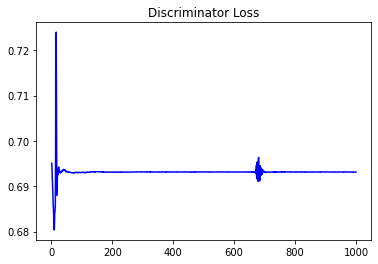

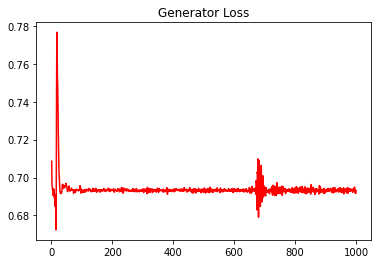

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03968144418113725


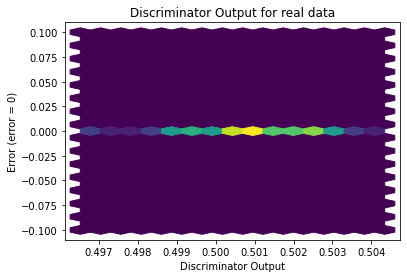

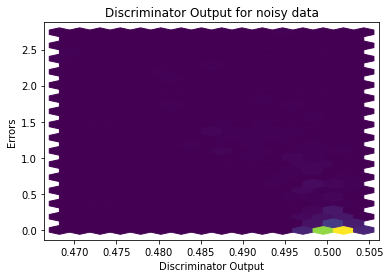

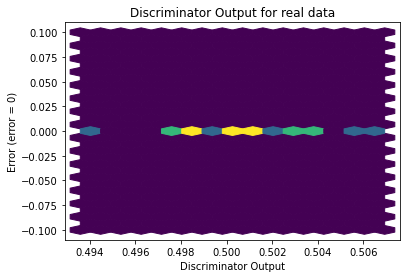

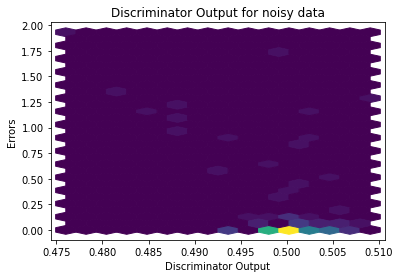

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


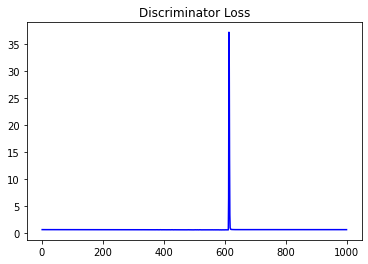

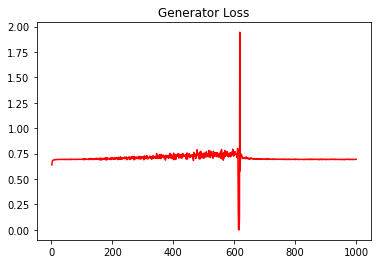

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09217679597906234


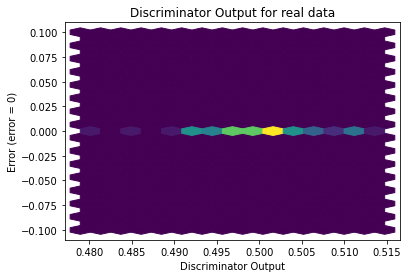

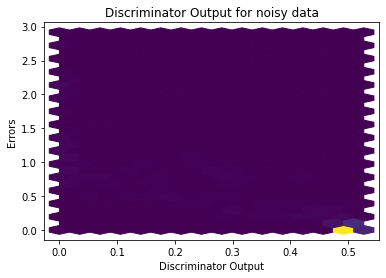

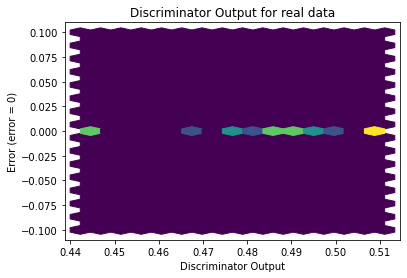

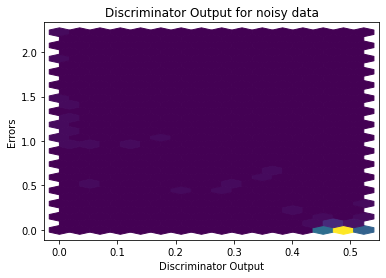

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0004]], requires_grad=True)
